## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# 사이파이 패키지
from scipy.stats import *  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# statsmodels 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인 및 전처리

## Dataset 불러오기 및 data 정보 확인

### 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


### data 정보 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## x값(예측변수), y값(목표변수) 설정
- svm 시각화를 위해 x변수는 2개만 지정

In [4]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , [2,3] ]
y = df_iris.iloc[:, 4 ]

In [5]:
x

,Petal.Length,Petal.Width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0
149,5.4,2.3


In [6]:
y.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
# df_iris.data = df_iris.loc[ : , 'Sepal.Length':'Petal.Width' ] .values
# df_iris.feature_names = list( df_iris.drop('Species', axis=1) )

# df_iris.target = df_iris['Species']
# df_iris.target_names = list( df_iris['Species'].unique() )

## y값에 대한 Label Encoding 실행
- SVM 수행을 위해서는 y값을 숫자로 변환 필요

- `sklearn.preprocessing.LabelEncoder()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Methods : `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit
- Methods : `.transform()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.transform

In [8]:
# 문자로 된 범주형 데이터를 숫자로 변환
encoder = LabelEncoder()
encoder.fit(y)

y2 = encoder.transform(y)

y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
pd.DataFrame( { 'y' : y.unique(),
                'y_encoding': np.unique(y2) } )

,y,y_encoding
0,setosa,0
1,versicolor,1
2,virginica,2


# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y2,
                                                      test_size = 0.3,
                                                      random_state = 0 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({2: 39, 0: 34, 1: 32})

Counter({1: 18, 0: 16, 2: 11})


# SVM 모델 생성 및 학습
- `sklearn.svm: Support Vector Machines`  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
- 
- `sklearn.svm.SVC()` https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Attributes : `.classes_`

- Methods : `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit
- Methods : `.predict()` https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict
- Methods : `.score()`  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score
- 
- [참고] `svm.svc`와 `svm.linearsvc`의 차이???  https://stackoverflow.com/questions/33843981/under-what-parameters-are-svc-and-linearsvc-in-scikit-learn-equivalent/33844092#33844092

## LinearSVC 모델 생성 및 train 데이터로 학습

In [11]:
# svm 모델 생성
model_svm = SVC( C = 0.01,
                 kernel = 'linear',
                 gamma = 0.01 )

# 모델 학습
model_svm.fit( x_train, y_train )

SVC(C=0.01, gamma=0.01, kernel='linear')

In [12]:
# 모델이 분류한 카테고리 확인
model_svm.classes_

array([0, 1, 2])

# SVM 시각화

- `mlxtend.plotting.plot_decision_regions()`  http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

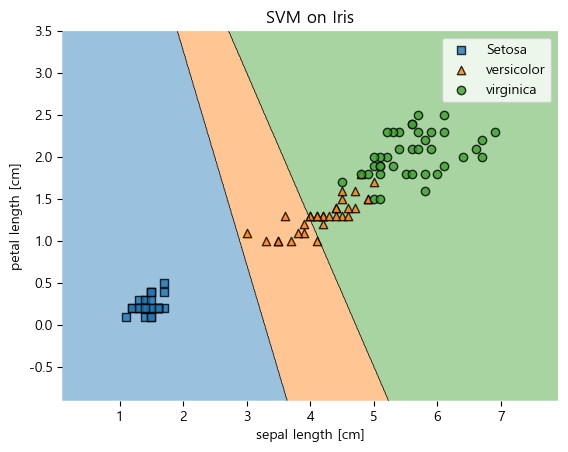

In [13]:
# Plotting decision regions
plot_decision_regions( x_train.values, y_train,  # x, y 모두 NumPy array 형식이어야 함.
                       clf = model_svm )

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('versicolor')
L.get_texts()[2].set_text('virginica')

plt.show()

## [미해결] 마진을 표현하는 선 추가

In [14]:
# 마진을 표현하는 선 추가 ( 종속변수가 3개 이상일때의 적용은 미해결)

# 결정 함수 플로팅
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
#xx = np.linspace(xlim[0], xlim[1], 30)  # 0에서 1까지의 구간을 30개 간격으로 나눈 배열 생성 
#yy = np.linspace(ylim[0], ylim[1], 30)
#YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T

#Z = model_svm.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])

#plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행

In [15]:
# test 데이터로 라벨 예측
y_pred = model_svm.predict( x_test )

print( 'Accuracy:', model_svm.score( x_test, y_test ) )
print()

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

Accuracy: 0.6888888888888889



,y_True,y_Predict,Pred_Result
0,2,2,True
1,1,1,True
2,0,0,True
3,2,2,True
4,0,0,True
5,2,2,True
6,0,0,True
7,1,2,False
8,1,2,False
9,1,2,False


## 평가

### Confusion Matrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- 
- `sklearn.metrics.multilabel_confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
- 
- `sklearn.metrics.ConfusionMatrixDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [16]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1,2
pred,,,
0,16,0,0
1,0,4,14
2,0,0,11


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0,  4, 14],
       [ 0,  0, 11]], dtype=int64)

In [18]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[29,  0],
        [ 0, 16]],

       [[27,  0],
        [14,  4]],

       [[20, 14],
        [ 0, 11]]], dtype=int64)

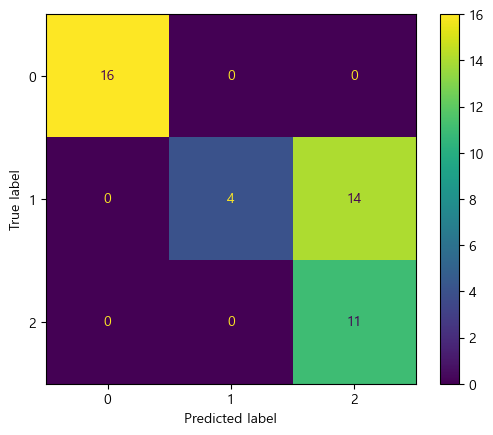

In [19]:
ConfusionMatrixDisplay( cm ).plot()

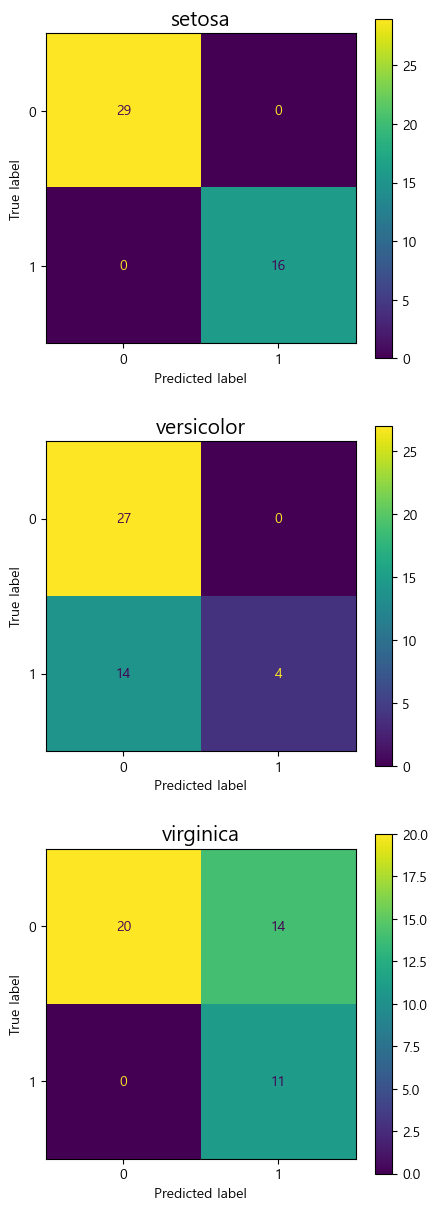

In [20]:
cm_0 = cm_multi[0]
cm_1 = cm_multi[1]
cm_2 = cm_multi[2]

fig = plt.figure( figsize = (5, 15) )

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title( y.unique()[0], size = 15 )

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title( y.unique()[1], size = 15 )

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title( y.unique()[2], size = 15 )

ConfusionMatrixDisplay(cm_0).plot(ax=ax0)
ConfusionMatrixDisplay(cm_1).plot(ax=ax1)
ConfusionMatrixDisplay(cm_2).plot(ax=ax2)

### 분석 지표
- `sklearn.metrics.accuracy_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- `sklearn.metrics.classification_report()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [21]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.6888888888888889

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     0.222     0.364        18
           2      0.440     1.000     0.611        11

    accuracy                          0.689        45
   macro avg      0.813     0.741     0.658        45
weighted avg      0.863     0.689     0.650        45




### ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Accuracy:  1.0
AUC:  1.0



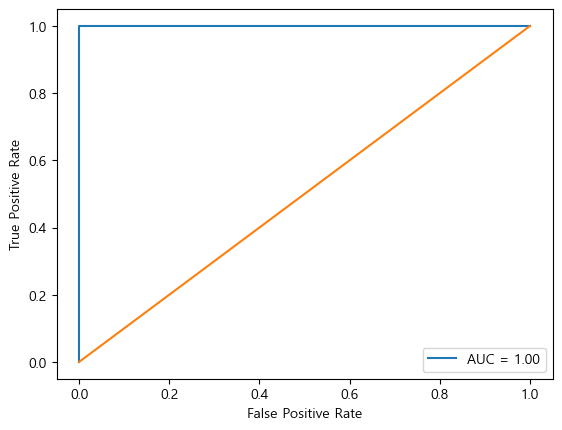

In [22]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 0, 1, 0 )
y_pred_1 = np.where( y_pred == 0, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_1, y_pred_1)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.6888888888888889
AUC:  0.6111111111111112



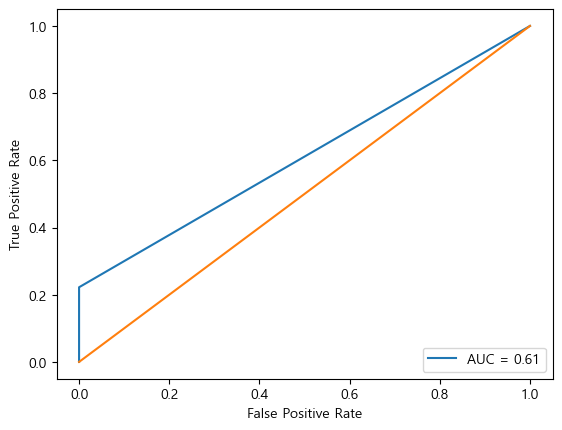

In [23]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 1, 1, 0 )
y_pred_2 = np.where( y_pred == 1, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_2, y_pred_2)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.6888888888888889
AUC:  0.7941176470588236



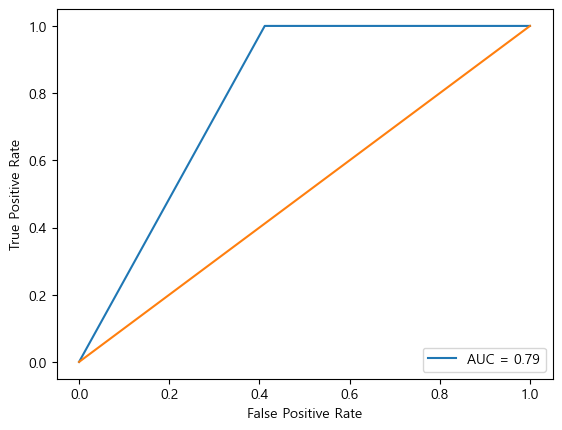

In [24]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 2, 1, 0 )
y_pred_3 = np.where( y_pred == 2, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_3, y_pred_3)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.

- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Attributes: `cv_results_`, `best_score_`, `best_params_`, `best_estimator_`

- Methods: `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params

### 파라미터 확인 및 평가 조건 설정

In [25]:
# 파라미터 목록 확인
list( model_svm.get_params() )

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [26]:
print(c)

NameError: name 'c' is not defined

In [38]:
# 평가할 파라미터 split 조건 설정

params = { 'C' : [ 10**-2, 10**-1 ],
           'kernel' : [ 'linear', 'poly', 'rbf', 'sigmoid' ],
           'gamma' : [ 'scale', 'auto', 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1 ] }

grid = GridSearchCV( model_svm,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy',
                     refit = True,
                     n_jobs = -1)

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10, estimator=SVC(C=0.01, gamma=0.01, kernel='linear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1],
                         'gamma': ['scale', 'auto', 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

### 최적의 파라미터 결과 확인

In [39]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      64 non-null     float64
 1   std_fit_time       64 non-null     float64
 2   mean_score_time    64 non-null     float64
 3   std_score_time     64 non-null     float64
 4   param_C            64 non-null     object 
 5   param_gamma        64 non-null     object 
 6   param_kernel       64 non-null     object 
 7   params             64 non-null     object 
 8   split0_test_score  64 non-null     float64
 9   split1_test_score  64 non-null     float64
 10  split2_test_score  64 non-null     float64
 11  split3_test_score  64 non-null     float64
 12  split4_test_score  64 non-null     float64
 13  split5_test_score  64 non-null     float64
 14  split6_test_score  64 non-null     float64
 15  split7_test_score  64 non-null     float64
 16  split8_test_score  64 non-nu

In [40]:
# pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
# pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','std_test_score', 'rank_test_score'] ].sort_values(['rank_test_score']).head(30)

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.966667,0.044721,1
20,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}",0.966667,0.044721,1
22,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.966667,0.044721,1
23,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.966667,0.044721,1
24,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.966667,0.044721,1
26,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.966667,0.044721,1
30,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.966667,0.044721,1
58,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.966667,0.044721,1
42,"{'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}",0.966667,0.044721,1
43,"{'C': 0.1, 'gamma': 1e-06, 'kernel': 'sigmoid'}",0.966667,0.044721,1


### 최적의 파라미터 추출

In [41]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.9667
최적 Parameters:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
최적 Estimators:  SVC(C=0.01, kernel='linear')


## 최적 Parameter 조건으로 모델 생성 및 학습

In [44]:
# SVM 모델 생성
tune_svm = SVC(C=0.01, kernel='linear')

# 모델 학습
tune_svm.fit( x_train, y_train )

SVC(C=0.01, kernel='linear')

## 최적화된 모델로 시각화

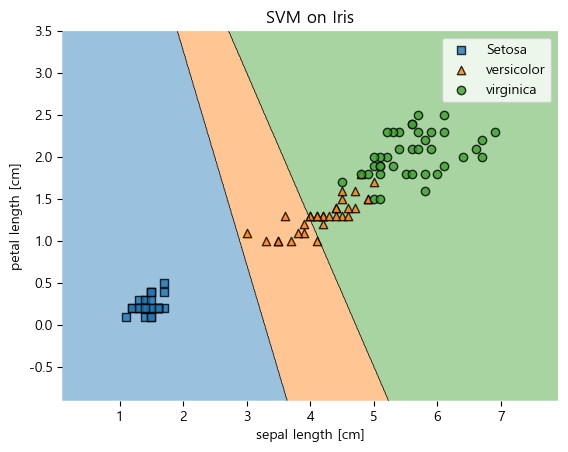

In [45]:
# Plotting decision regions
plot_decision_regions( x_train.values, y_train,
                       clf = tune_svm )

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('versicolor')
L.get_texts()[2].set_text('virginica')

plt.show()

## 최적화 모델 평가

### 학습된 모델로 예측 수행

In [37]:
# test 데이터로 라벨 예측
y_pred = tune_svm.predict( x_test )

print( 'Accuracy:', tune_svm.score( x_test, y_test ) )
print()

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

Accuracy: 0.24444444444444444



,y_True,y_Predict,Pred_Result
0,2,2,True
1,1,2,False
2,0,2,False
3,2,2,True
4,0,2,False
5,2,2,True
6,0,2,False
7,1,2,False
8,1,2,False
9,1,2,False


### 평가

#### Confusion Metrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay( cm ).plot()

In [ ]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)

fig = plt.figure( figsize = (5, 15) )

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title( y.unique()[0], size = 15 )

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title( y.unique()[1], size = 15 )

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title( y.unique()[2], size = 15 )

ConfusionMatrixDisplay( cm_multi[0] ).plot(ax=ax0)
ConfusionMatrixDisplay( cm_multi[1] ).plot(ax=ax1)
ConfusionMatrixDisplay( cm_multi[2] ).plot(ax=ax2)

#### 분석 지표

In [ ]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

#### ROC curve / AUC

In [ ]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 0, 1, 0 )
y_pred_1 = np.where( y_pred == 0, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_1, y_pred_1)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [ ]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 1, 1, 0 )
y_pred_2 = np.where( y_pred == 1, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_2, y_pred_2)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 2, 1, 0 )
y_pred_3 = np.where( y_pred == 2, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_3, y_pred_3)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()